# Identificação de Clientes de Alto Valor

## Planejamento da Solução

### Entrada

O problema de negócio
1. Selecionar os mais valiosos clientes para formar o programa de fidelidade "INSIDERS"
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )

### Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade "INSIDERS".
2. Relatório com as respostas para as seguintes perguntas:
- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo ?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento ?

### Processo

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível? O que são clientes de maior valor?
    - Faturamento:
        - Alto Ticket Médio
        - Alto LTV (Life Time Value)
        - Baixo recência
        - Alto basket size (quantidade média de produtos comprados)
        - Baixa probabilidade de Churn
        - Previsão alta de LTV
        - Alta propensão de compra
    - Custo:
        - Baixa taxa de devolução
        
    - Experiência:
        - Alta média de avaliação
2. **Quantos clientes farão parte do grupo?**
     - Número de clientes
     - Porcentagem do total
     
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - Localização
        - Salário
    - Escrever as principais característica de consumo
        - Atributos de Clusterização

4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Faturamento total do ano
    - Faturamento do grupo de Insiders

5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - LTV do grupo Insiders
    - Série temporais (ARMA, ARIMA, HoltWinter, etc)

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Definir a periodicidade (1 mês, 2 meses, 3 meses...)
    - A pessoa precisa de parecido/similiar com outras que já estão no grupo

7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - Definir a periodicidade (1 mês, 2 meses, 3 meses...)
    - A pessoa não ser parecido/similiar com outras que já estão no grupo    

8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste A/B
    - Teste A/B de Bayesiano
    - Teste de hipótese
        
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento ?**
    - Desconto
    - Preferências de escolha
    - Produtos exclusivos

# Imports

In [206]:
import pandas as pd
import numpy as np
import inflection

import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from plotly import express as px

## Loading

In [172]:
data = pd.read_csv('datasets/ecommerce.csv', encoding='unicode_escape')

In [173]:
# drop de coluna
data = data.drop('Unnamed: 8', axis=1)

# 1 Descrição dos Dados

In [174]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.1 Renomeando as Colunas

In [175]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [176]:
old_cols = list(data.columns)

new_cols = []

for c in old_cols:
    new_cols.append(inflection.underscore(c))

data.columns = new_cols

In [177]:
data.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [178]:
data.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2 Tamanho do Conjunto de Dados 

In [18]:
print(f'Linhas: {data.shape[0]}')
print(f'Colunas: {data.shape[1]}')

Linhas: 541909
Colunas: 8


## 1.3 Tipos dos Dados

In [19]:
data.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [21]:
data.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA's

In [22]:
# drop NA
data = data.dropna()

## 1.6 Troca dos Tipos dos Dados

In [23]:
# invoice_date
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d-%b-%y')

# customer_id
data['customer_id'] = data['customer_id'].astype('int64')


## 1.7 Estatística Descritiva

# 2 Features Engineering

In [132]:
df2 = data.copy()

In [133]:
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1)
df_ref = df_ref.drop_duplicates().reset_index(drop=True)

# RFM (Recency, Frequency and Monetary  / Recência, Frequência e Monetário)

# Recency - Data de Hoje -(menos) Última data de compra do cliente ( como não faz sentido colocar a data de hoje, faremos
# Última data registrada do DF -(menos) Últidma data de compra do cliente)
df2['recency_days'] = df2['invoice_date'].max() - df2['invoice_date']
df_recency = df2[['customer_id', 'recency_days']].groupby('customer_id').min().reset_index()
df_recency['recency_days'] = df_recency['recency_days'].dt.days     # extrai o dia como int64

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq.columns = ['customer_id', 'frequency']

# Monetary
df2['monetary'] = df2['unit_price']*df2['quantity']
df_monetary = df2[['customer_id', 'monetary']].groupby('customer_id').sum().reset_index()

In [134]:
# JOINS
df_ref = df_ref.merge(df_monetary, how='left')
df_ref = df_ref.merge(df_recency, how='left')
df_ref = df_ref.merge(df_freq, how='left')

In [136]:
df_ref.head()

,customer_id,monetary,recency_days,frequency
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


In [135]:
# Check NAs
df_ref.isna().sum()

customer_id     0
monetary        0
recency_days    0
frequency       0
dtype: int64

# 3 Filtragem de Variáveis

# 4 Análise Explooratória dos Dados

# 5 Preparação dos Dados

# 6 Seleção dos Atributos

# 7 Hyperparameter Fine-Tunning

In [137]:
df7 = df_ref.copy()

In [138]:
X = df7.drop('customer_id', axis=1)

In [139]:
clusters = [2, 3, 4, 5, 6]

## 7.1 Within-Cluster Sum of Square (WSS)

### 7.1.1 Sem usar a Biblioteca  Yellowbrick

Text(0.5, 1.0, 'WSS vs K')

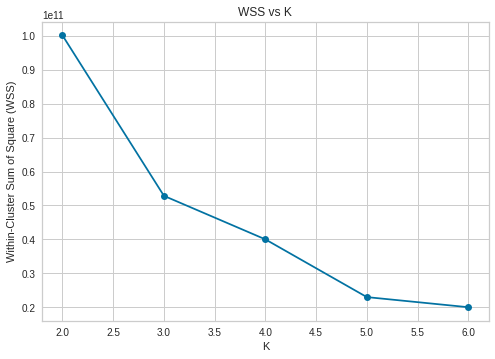

In [168]:
wss = []

for k in clusters:
    # model definition
    kmeans = KMeans(init = 'random', n_clusters=k, n_init=10, max_iter=300, random_state=271)
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_)
    
# plot

plt.plot(clusters, wss, linestyle='-', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Square (WSS)')
plt.title('WSS vs K')
    

### 7.1.2 Usando a Biblioteca Yellowbrick

In [161]:
from  yellowbrick.cluster import KElbowVisualizer

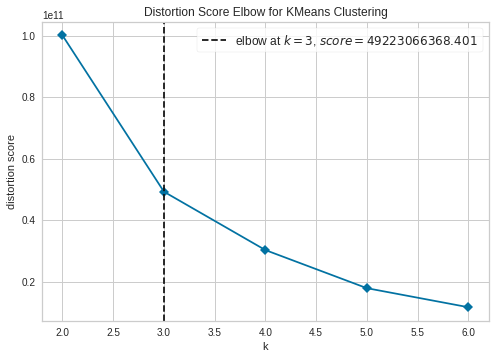

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [164]:
kmeans = KElbowVisualizer(KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

## 7.2 Silhouette Score

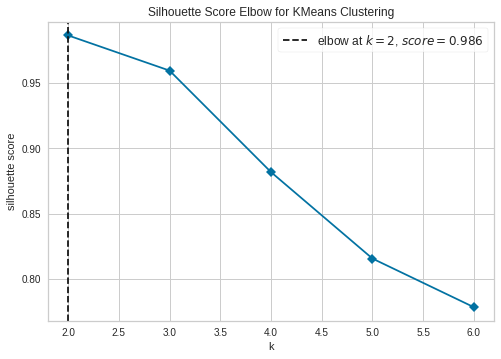

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [167]:
kmeans = KElbowVisualizer(KMeans(), k=clusters, metric = 'silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

Analisando os resultados do WSS e da Silhueta vamos seguir para o Treinamento do Modelo com k = 3 (3 clusters).

# 8 Treinamento do Modelo

## 8.1 KMeans

In [196]:
# model definion
k = 3
kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=271)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 8.2 Validation

In [199]:
# WSS
print(f'WSS Score: {kmeans.inertia_}')


# Silhouette
s = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Score: {s}')

WSS Score: 52830442008.00697
Silhouette Score: 0.9494677566681542


# 9 Análise dos Clusters

In [201]:
df9 = df7.copy()
df9['clusters'] = labels

In [202]:
df9.head()

,customer_id,monetary,recency_days,frequency,clusters
0,17850,5288.63,302,35,1
1,13047,3079.10,31,18,1
2,12583,7187.34,2,18,1
3,13748,948.25,95,5,1
4,15100,635.10,330,6,1


## 9.1 Inspeção por Visualização

In [208]:
fig = px.scatter_3d(df9, x='recency_days', y='frequency', z='monetary', color='clusters')

In [210]:
fig.show()

## 9.2 Perfil dos Clusters

In [211]:
df9.head()

,customer_id,monetary,recency_days,frequency,clusters
0,17850,5288.63,302,35,1
1,13047,3079.10,31,18,1
2,12583,7187.34,2,18,1
3,13748,948.25,95,5,1
4,15100,635.10,330,6,1


In [241]:
# Number of Clusters
df_clusters = df9[['customer_id', 'clusters']].groupby('clusters').count().reset_index()
df_clusters['customer_perc'] = 100*(df_clusters['customer_id'] / df_clusters['customer_id'].sum())

# AVG Monetary
df_avg_monetary = df9[['monetary', 'clusters']].groupby('clusters').mean().reset_index()
df_clusters = df_clusters.merge(df_avg_monetary, on='clusters')
df_clusters['monetary_avg_perc'] = 100*(df_clusters['monetary'] / df_clusters['monetary'].sum())

# AVG Recency_days
df_avg_recency = df9[['recency_days', 'clusters']].groupby('clusters').mean().reset_index()
df_clusters = df_clusters.merge(df_avg_recency, on='clusters')

# AVG Frequency
df_avg_freq = df9[['frequency', 'clusters']].groupby('clusters').mean().reset_index()
df_clusters = df_clusters.merge(df_avg_freq, on='clusters')

# Rename columns
df_clusters.columns = ['clusters', 'num_customer', 'customer_perc', 'monetary_avg', 'monetary_avg_perc', 'recency_days_avg', 'frequency_avg']

In [242]:
df_clusters

,clusters,num_customer,customer_perc,monetary_avg,monetary_avg_perc,recency_days_avg,frequency_avg
0,0,31,0.709058,40543.517742,18.091863,13.290323,53.290323
1,1,4335,99.153705,1372.577826,0.612490,92.257901,4.614533
2,2,6,0.137237,182181.981667,81.295647,7.166667,89.000000


### **Cluster 01 (Candidatos à Insiders):**
- Número de Clientes: 6 (0.13% dos clientes)
- Receita Média: $182.182,00 (81.3% da receita total)
- Recência Média: 7 dias
- Frequência Média: 89 compras


### **Cluster 02:**
- Número de Clientes: 31 (0.7% dos clientes)
- Receita Média: $40.543 (1861% da receita total)
- Recência Média: 13 dias
- Frequência Média: 53 compras


### **Cluster 03:**
- Número de Clientes: 4335 (99%  dos clientes)
- Receita Média: $1372,00 (0.6% da receita total)
- Recência Média: 92 dias
- Frequência Média: 5 compras


# 10 Deploy do Modelo em Produção